In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [45]:
ames_df = pd.read_table('Ames_Housing_Data.tsv')
ames_df.head(1)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000


#### Remove any observations where 'Gr Liv Area' >4000

In [46]:
ames_new_Df = ames_df[ames_df['Gr Liv Area'] <= 4000]

In [47]:
ames_new_Df.shape

(2925, 82)

#### Checking the null values

In [48]:
ames_new_Df.isna().sum()

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2727
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

#### Dropping the columns with maximum null values as they don't contribute much to the dataset

In [49]:
ames_new_Df.drop(columns=['Alley','Fireplace Qu','Pool QC','Fence','Misc Feature','Lot Frontage'], axis=1,inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
ames_new_Df.isna().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       23
Mas Vnr Area       23
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          80
                 ... 
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Cars         1
Garage Are

#### Dropping the null values and creating a new dataset

In [51]:
tsv_data = ames_new_Df.dropna()

In [52]:
tsv_data.shape #new data has 76 columns and 2673 rows

(2673, 76)

In [53]:
Ames_subset = tsv_data[['Lot Area','Overall Qual','Overall Cond','Year Built','Year Remod/Add','Gr Liv Area','Full Bath'
                    ,'Bedroom AbvGr','Fireplaces','Garage Cars','SalePrice']]

In [54]:
Ames_subset.head(2)

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2.0,215000
1,11622,5,6,1961,1961,896,1,2,0,1.0,105000


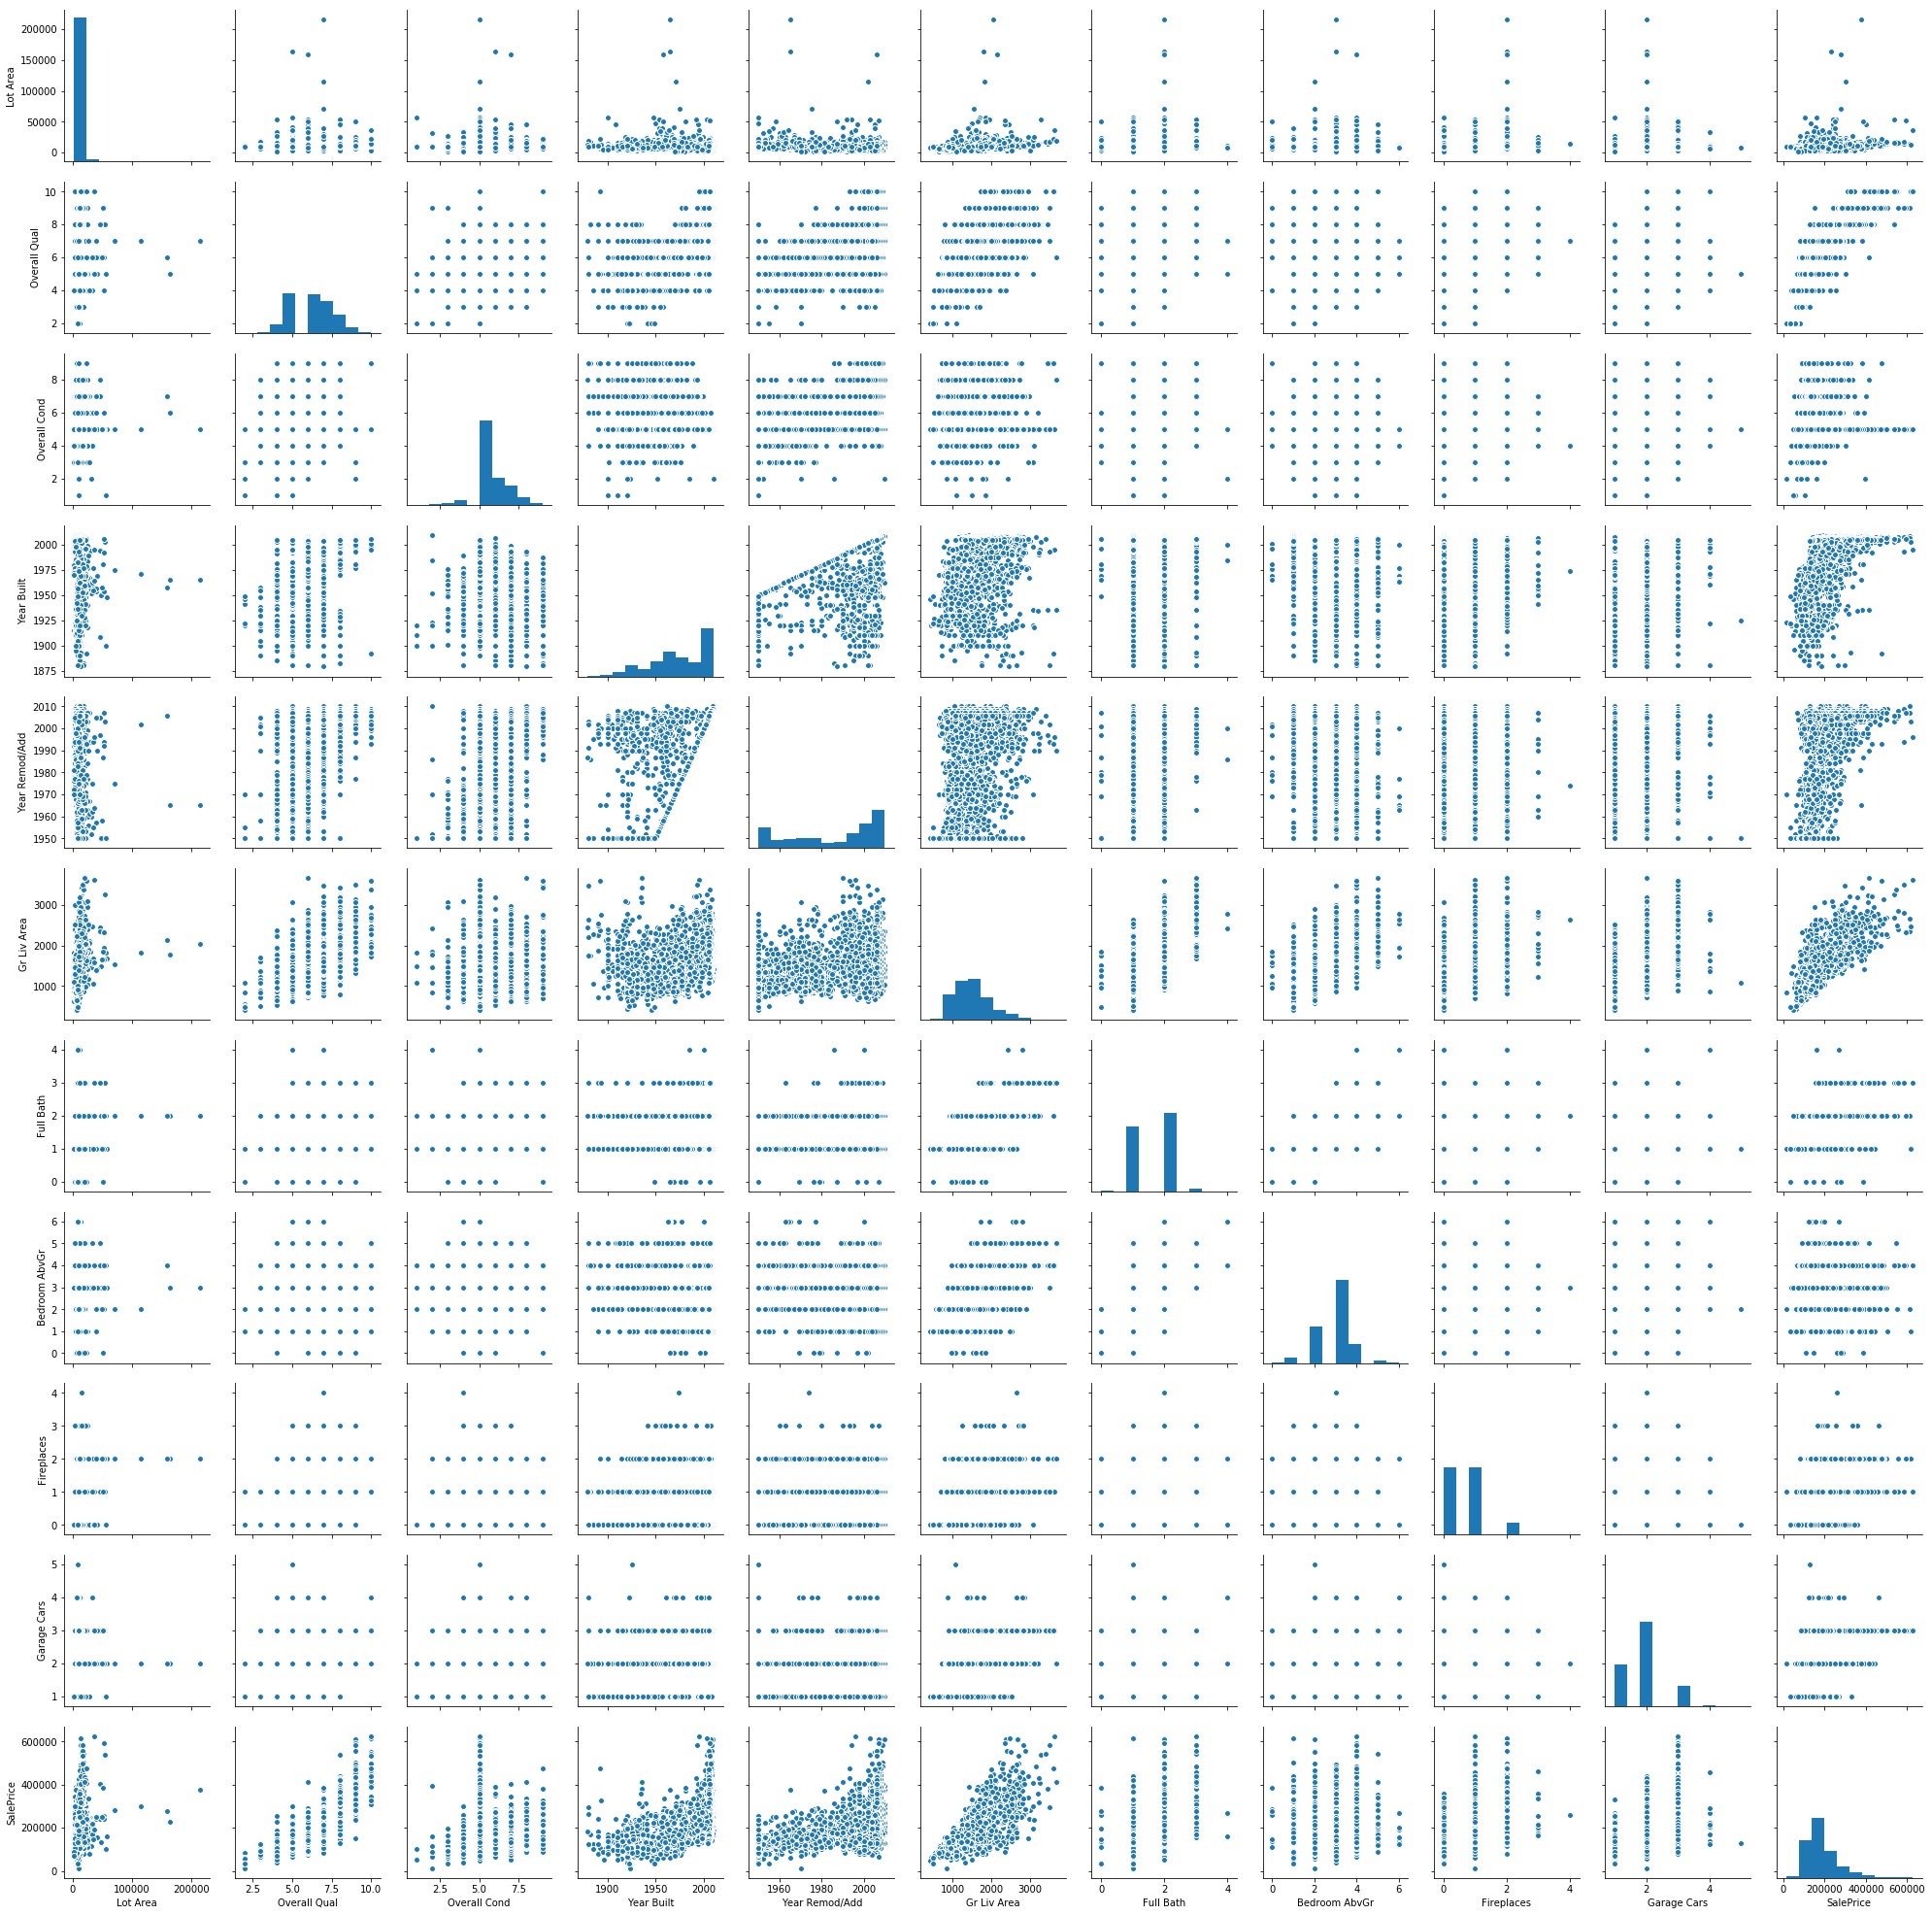

In [55]:
sns.pairplot(Ames_subset)

#### Q1 :Which variables seem to have a strong relationship with SalePrice?

There appears to be a linear relationship with <b> LotArea </b> with some extreme outliers in Lotarea which are not in accordance to the high sale prices. 
Also, theres a great linear relationship between <b>(Overall Qual and Sales Price)</b> because as the quality increases, price increases as well.
There's linear relationship between Overall cond and Sales price except in the middle(at 5.0) as its showing more variance so not a stronger relation.
There a clear upward trend between <b> (Year built and Sales price)</b> with high variance towards the end.
Also, theres a relationship between Year Remod and Sales price with wider spread throughtout and much high variance in the recent years.

#### But the more stronger relationship seems to be between 'Gr Liv Area and Sales price','Overall Qual and Sales price(higher the quality, higher the price),'Year built and Sales Price'

#### Q2 : The scatterplots of Year Built vs Year Add/Remod have an interesting structure. Can you explain what is going on there?

The data seems to be little weird as most of the remodelling starts happening either in the same year of building or within a year of the house being built. The same can be shown as below by taking the difference between year of built and remodelling. 

In [56]:
import numpy as np
year_diff=(tsv_data['Year Remod/Add'] - tsv_data['Year Built']).value_counts()
year_diff.iloc[np.lexsort([year_diff.index])>-1].head(10)

0     1457
1      408
30      33
40      26
25      24
35      22
2       22
10      19
20      18
11      18
dtype: int64

#### Q3: In the plot of "Lot Area" vs "SalePrice", some outliers are making the plot less visually useful. How can we make the plot look better?

Visually, it seems that theres a linear relationship between <b>'Lot Area' and 'Sales Price' </b>with some extreme outliers after 60000 which are making the plot less useful. In order to make the plot look better, we have to throw the extreme outliers as follows: 

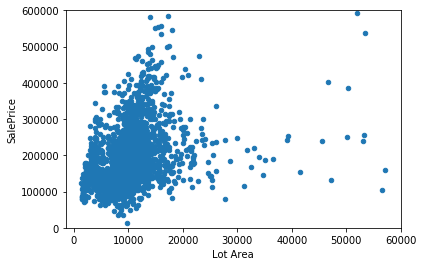

In [57]:
x_data = 'Lot Area'
df_test = tsv_data.loc[tsv_data[x_data] < 60000]
data = pd.concat([df_test['SalePrice'], df_test[x_data]], axis=1)
data.plot.scatter(x=x_data, y='SalePrice', ylim=(0,600000));

Its showing an upward trend with increase in lotarea but still there are few exceptions. What if we can further reduce the LotArea to check the trend showing as below:


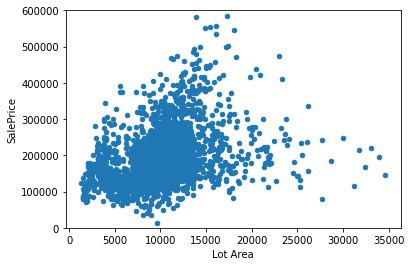

In [58]:
x_data = 'Lot Area'
df_test = tsv_data.loc[tsv_data[x_data] < 35000]
data = pd.concat([df_test['SalePrice'], df_test[x_data]], axis=1)
data.plot.scatter(x=x_data, y='SalePrice', ylim=(0,600000));

#### Conclusion: From the graph, we can deduce that though theres a general upward trend in Sales Price with increase in Lot Area but there's a huge variance in data. 

### Split the data into 70/30 train.test split (from sklearn.cross_validation import train_test_split)

In [59]:
new_X = tsv_data.drop('SalePrice',axis=1)
X = new_X
y = tsv_data['SalePrice']

#### Dividing the data into 70:30 training test ratio

In [60]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(1871, 75) (1871,)
(802, 75) (802,)


#### To check how is model perfoming

In [61]:
# Linear Regression using statsmodels
sm_model = sm.OLS(y_train, sm.add_constant(X_train['Gr Liv Area'])).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     2112.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):          3.74e-309
Time:                        23:22:10   Log-Likelihood:                -23055.
No. Observations:                1871   AIC:                         4.611e+04
Df Residuals:                    1869   BIC:                         4.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4293.4529   4159.755      1.032      0.302   -3864.801    1.25e+04
Gr Liv Area   120.9033      2.631     45.952      0.000     115.743     126.063
==============================================================================
Omnibus:                      307.459   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1097.574
Skew:                           0.786   Prob(JB):                    4.62e-239
Kurtosis:                       6.407   Cond. No.                     5.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
sm_model.resid.describe()

count    1.871000e+03
mean    -6.135759e-11
std      5.436068e+04
min     -2.102329e+05
25%     -2.883910e+04
50%     -2.455390e+03
75%      2.326671e+04
max      3.120753e+05
dtype: float64

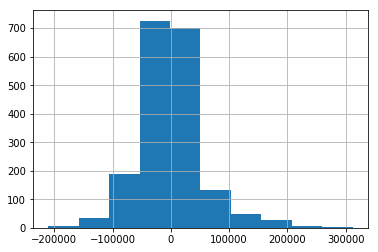

In [63]:
sm_model.resid.hist()

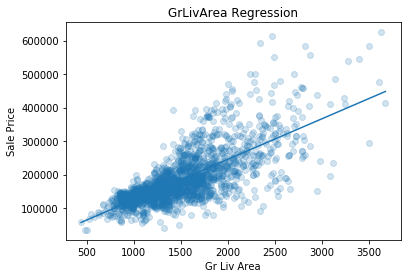

In [64]:
plt.scatter(X_train['Gr Liv Area'], y_train, alpha=0.2)
xx = np.linspace(X_train['Gr Liv Area'].min(), X_train['Gr Liv Area'].max(), X_train['Gr Liv Area'].shape[0])
plt.plot(xx, sm_model.params[0] + sm_model.params[1]*xx)
plt.title('GrLivArea Regression')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price');

#### Conclusion: 
From the <b> histogram, regression Summary and plot </b> we can see that R - square is averagely significant and the errors are not normally distributed. They represent less variance at the beginning but the variance increases towards the end or in other words, its widely distributed towards end.  

#### Diagnostic plot 

In [65]:
import diagnostic_plots

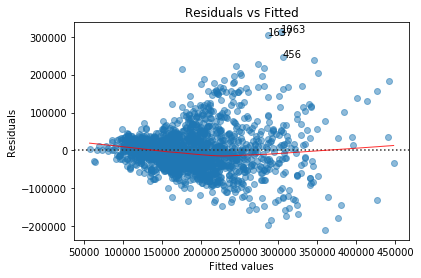

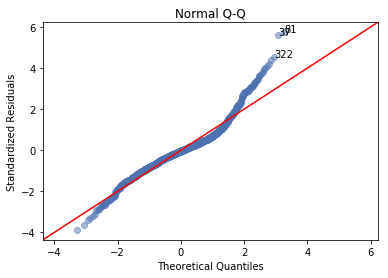

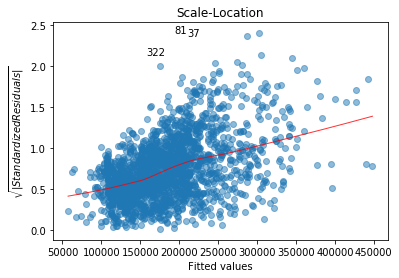

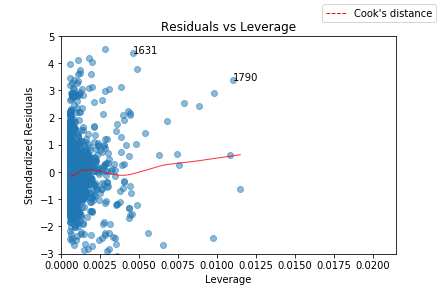

In [66]:
diagnostic_plots.diagnostic_plots(X_train['Gr Liv Area'],y_train,model_fit=sm_model)

#### Residuals vs Fitted plot is showing almost linear regression. Also,from the Normal Q-Q graph, we can conclude that data is not normally distributed towards right though it has improved on left and error terms doesn't have a constant variance. Thus, it violates the assumption of linear regression.

In [67]:
y_pred = sm_model.predict(sm.add_constant(X_test['Gr Liv Area']))

In [68]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

50658.66688995473


The RMSE comes around = <b>50658.66</b>

### Multiple Linear Regression

In [69]:
multivar_model = sm.OLS(y_train,sm.add_constant(X_train[['Lot Area','Overall Qual','Overall Cond',
                                                         'Year Built','Year Remod/Add',
                        'Gr Liv Area','Full Bath','Bedroom AbvGr','Fireplaces','Garage Cars']])).fit()
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     868.1
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:20   Log-Likelihood:                -22139.
No. Observations:                1871   AIC:                         4.430e+04
Df Residuals:                    1860   BIC:                         4.436e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.296e+06   1.04e+05    -12.462      0.000    -1.5e+06   -1.09e+06
Lot Area           1.5331      0.128     11.965      0.000       1.282       1.784
Overall Qual    2.024e+04    944.214     21.437      0.000    1.84e+04    2.21e+04
Overall Cond    6485.7469    877.041      7.395      0.000    4765.659    8205.835
Year Built       591.1985     45.828     12.900      0.000     501.318     681.079
Year Remod/Add    21.7960     58.024      0.376      0.707     -92.002     135.594
Gr Liv Area       80.0310      2.992     26.748      0.000      74.163      85.899
Full Bath      -1.046e+04   2138.920     -4.888      0.000   -1.47e+04   -6260.893
Bedroom AbvGr  -1.372e+04   1278.386    -10.735      0.000   -1.62e+04   -1.12e+04
Fireplaces      5090.1109   1370.091      3.715      0.000    2403.033    7777.189
Garage Cars     1.448e+04   1713.755      8.450      0.000    1.11e+04    1.78e+04
==============================================================================
Omnibus:                      455.608   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3502.024
Skew:                           0.928   Prob(JB):                         0.00
Kurtosis:                       9.440   Cond. No.                     1.65e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above summary, it is clear that <b> Year Remod/Add </b>is not significant, so I am removing that and re-running the model again.

In [70]:
multivar_refresh = sm.OLS(y_train,sm.add_constant(X_train[['Lot Area','Overall Qual','Overall Cond','Year Built',
                        'Gr Liv Area','Full Bath','Bedroom AbvGr','Fireplaces','Garage Cars']])).fit()
multivar_refresh.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     965.0
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:22   Log-Likelihood:                -22139.
No. Observations:                1871   AIC:                         4.430e+04
Df Residuals:                    1861   BIC:                         4.435e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.271e+06   7.83e+04    -16.229      0.000   -1.42e+06   -1.12e+06
Lot Area          1.5333      0.128     11.969      0.000       1.282       1.785
Overall Qual   2.028e+04    937.617     21.632      0.000    1.84e+04    2.21e+04
Overall Cond   6612.4129    809.440      8.169      0.000    5024.907    8199.919
Year Built      599.5076     40.127     14.940      0.000     520.809     678.207
Gr Liv Area      80.1617      2.971     26.981      0.000      74.335      85.989
Full Bath     -1.031e+04   2101.049     -4.905      0.000   -1.44e+04   -6185.603
Bedroom AbvGr -1.381e+04   1254.850    -11.009      0.000   -1.63e+04   -1.14e+04
Fireplaces     5019.8302   1356.943      3.699      0.000    2358.540    7681.120
Garage Cars    1.451e+04   1711.501      8.478      0.000    1.12e+04    1.79e+04
==============================================================================
Omnibus:                      455.004   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3490.284
Skew:                           0.927   Prob(JB):                         0.00
Kurtosis:                       9.429   Cond. No.                     1.23e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
y_pred_new = multivar_refresh.predict(sm.add_constant(X_test[['Lot Area','Overall Qual','Overall Cond','Year Built',
                        'Gr Liv Area','Full Bath','Bedroom AbvGr','Fireplaces','Garage Cars']]))

#### New RMSE

In [72]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred_new)))

33525.55473258728


Yes, the <b> new RMSE is much less</b> as compared to the previous one.

#### Can you improve the model by making transformations to the features? 

First just including <i>GrLivArea and OverAllQual</i> to check their significance. 

In [73]:
transform1 = sm.OLS(y_train, sm.add_constant(X_train[['Gr Liv Area','Overall Qual']])).fit()
transform1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     2795.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:25   Log-Likelihood:                -22467.
No. Observations:                1871   AIC:                         4.494e+04
Df Residuals:                    1868   BIC:                         4.496e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -1.2e+05   4324.121    -27.757      0.000   -1.29e+05   -1.12e+05
Gr Liv Area     64.9516      2.369     27.418      0.000      60.306      69.598
Overall Qual  3.357e+04    830.726     40.416      0.000    3.19e+04    3.52e+04
==============================================================================
Omnibus:                      345.646   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1708.764
Skew:                           0.785   Prob(JB):                         0.00
Kurtosis:                       7.411   Cond. No.                     7.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<i> Now, trying to apply logarithmic transformation on them to check if it affects the R-Square and the statistic significance. From the below line, we can say that we can take logrithmic transformation of GrLivArea and OverallQual with SalePrice as it helped to raise the significance a little.</i>

In [74]:
transform_chk = sm.OLS(np.log1p(y_train), sm.add_constant(np.log1p(X_train[['Gr Liv Area','Overall Qual']]))).fit()
transform_chk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     2883.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                 453.86
No. Observations:                1871   AIC:                            -901.7
Df Residuals:                    1868   BIC:                            -885.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3217      0.105     60.328      0.000       6.116       6.527
Gr Liv Area      0.4761      0.018     27.030      0.000       0.442       0.511
Overall Qual     1.1628      0.029     40.717      0.000       1.107       1.219
==============================================================================
Omnibus:                      150.062   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.962
Skew:                          -0.509   Prob(JB):                     3.32e-70
Kurtosis:                       4.751   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Applying the transformation to the model as below:

In [75]:
multivar_transform = sm.OLS(np.log1p(y_train),sm.add_constant(np.log1p(X_train[['Lot Area','Overall Qual',
                                                                                'Overall Cond','Year Built',
                        'Gr Liv Area','Full Bath','Bedroom AbvGr','Fireplaces','Garage Cars']]))).fit()
multivar_transform.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1432.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:29   Log-Likelihood:                 1073.7
No. Observations:                1871   AIC:                            -2127.
Df Residuals:                    1861   BIC:                            -2072.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -57.7111      2.431    -23.738      0.000     -62.479     -52.943
Lot Area          0.1359      0.007     19.293      0.000       0.122       0.150
Overall Qual      0.6140      0.027     22.923      0.000       0.561       0.667
Overall Cond      0.3840      0.022     17.758      0.000       0.342       0.426
Year Built        8.3107      0.318     26.158      0.000       7.688       8.934
Gr Liv Area       0.5021      0.018     27.605      0.000       0.466       0.538
Full Bath        -0.0132      0.021     -0.618      0.537      -0.055       0.029
Bedroom AbvGr    -0.1902      0.018    -10.824      0.000      -0.225      -0.156
Fireplaces        0.0708      0.009      7.612      0.000       0.053       0.089
Garage Cars       0.1339      0.020      6.835      0.000       0.095       0.172
==============================================================================
Omnibus:                      158.426   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.267
Skew:                          -0.345   Prob(JB):                    2.73e-131
Kurtosis:                       5.690   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Full Bath can be removed as its not significant

In [76]:
multivar_rerun = sm.OLS(np.log1p(y_train),sm.add_constant(np.log1p(X_train[['Lot Area','Overall Qual','Overall Cond','Year Built',
                        'Gr Liv Area','Bedroom AbvGr','Fireplaces','Garage Cars']]))).fit()
multivar_rerun.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1612.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:32   Log-Likelihood:                 1073.5
No. Observations:                1871   AIC:                            -2129.
Df Residuals:                    1862   BIC:                            -2079.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -57.2941      2.335    -24.536      0.000     -61.874     -52.714
Lot Area          0.1364      0.007     19.472      0.000       0.123       0.150
Overall Qual      0.6128      0.027     22.943      0.000       0.560       0.665
Overall Cond      0.3845      0.022     17.800      0.000       0.342       0.427
Year Built        8.2581      0.306     26.986      0.000       7.658       8.858
Gr Liv Area       0.4984      0.017     29.083      0.000       0.465       0.532
Bedroom AbvGr    -0.1929      0.017    -11.316      0.000      -0.226      -0.159
Fireplaces        0.0713      0.009      7.689      0.000       0.053       0.089
Garage Cars       0.1322      0.019      6.819      0.000       0.094       0.170
==============================================================================
Omnibus:                      157.864   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              597.191
Skew:                          -0.344   Prob(JB):                    2.10e-130
Kurtosis:                       5.681   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y_pred_new = multivar_rerun.predict(sm.add_constant(np.log1p(X_test[['Lot Area','Overall Qual','Overall Cond','Year Built',
                        'Gr Liv Area','Bedroom AbvGr','Fireplaces','Garage Cars']])))

In [78]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,np.expm1(y_pred_new))))

29474.580822142463


<b>New RMSE:</b> 29474.58

<i> Now taking the model we created at the beginning without the above tranformed model</i>

Since I thought that high quality big houses with big basements and more rooms and more Floor square feet would be more expensive so thought of adding 'Total Bsmt SF','TotRms AbvGrd','1stFlrSF' and 'Garage Area'

In [79]:
# Linear Regression using statsmodels
new_model1 = sm.OLS(np.log1p(y_train), sm.add_constant(np.log1p(X_train[['Total Bsmt SF','TotRms AbvGrd','1st Flr SF',
                                                      'Bedroom AbvGr','Garage Area',
                                                      'Lot Area','Year Built','Overall Cond',
                                                      'Fireplaces','Garage Cars',
                                                    'Overall Qual',
                     'Gr Liv Area']]))).fit()
new_model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1229.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:38   Log-Likelihood:                 1186.3
No. Observations:                1871   AIC:                            -2347.
Df Residuals:                    1858   BIC:                            -2275.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -53.4385      2.235    -23.906      0.000     -57.823     -49.054
Total Bsmt SF     0.1310      0.015      8.825      0.000       0.102       0.160
TotRms AbvGrd     0.0504      0.029      1.750      0.080      -0.006       0.107
1st Flr SF        0.0268      0.019      1.430      0.153      -0.010       0.063
Bedroom AbvGr    -0.1744      0.019     -9.401      0.000      -0.211      -0.138
Garage Area       0.0514      0.017      3.101      0.002       0.019       0.084
Lot Area          0.0983      0.007     13.616      0.000       0.084       0.112
Year Built        7.6581      0.295     25.991      0.000       7.080       8.236
Overall Cond      0.4125      0.020     20.137      0.000       0.372       0.453
Fireplaces        0.0621      0.009      6.997      0.000       0.045       0.080
Garage Cars       0.0387      0.028      1.367      0.172      -0.017       0.094
Overall Qual      0.5720      0.025     22.554      0.000       0.522       0.622
Gr Liv Area       0.4480      0.020     22.093      0.000       0.408       0.488
==============================================================================
Omnibus:                      218.865   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1044.987
Skew:                          -0.454   Prob(JB):                    1.21e-227
Kurtosis:                       6.547   Cond. No.                     1.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It seems that 1st Flr SF and Garage cars are being represented already by some other factor so I am removing it and rerunning the model.

In [80]:
remodel1 = sm.OLS(np.log1p(y_train), sm.add_constant(np.log1p(X_train[['Total Bsmt SF','TotRms AbvGrd',
                                                      'Bedroom AbvGr','Garage Area',
                                                      'Lot Area','Year Built','Overall Cond',
                                                      'Fireplaces',
                                                    'Overall Qual',
                     'Gr Liv Area']]))).fit()
remodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1474.
Date:                Mon, 08 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:22:41   Log-Likelihood:                 1184.4
No. Observations:                1871   AIC:                            -2347.
Df Residuals:                    1860   BIC:                            -2286.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -53.6752      2.197    -24.426      0.000     -57.985     -49.365
Total Bsmt SF     0.1460      0.010     14.370      0.000       0.126       0.166
TotRms AbvGrd     0.0526      0.029      1.829      0.068      -0.004       0.109
Bedroom AbvGr    -0.1785      0.018     -9.699      0.000      -0.215      -0.142
Garage Area       0.0699      0.011      6.514      0.000       0.049       0.091
Lot Area          0.1001      0.007     14.222      0.000       0.086       0.114
Year Built        7.6802      0.291     26.403      0.000       7.110       8.251
Overall Cond      0.4126      0.020     20.171      0.000       0.372       0.453
Fireplaces        0.0643      0.009      7.314      0.000       0.047       0.082
Overall Qual      0.5758      0.025     22.862      0.000       0.526       0.625
Gr Liv Area       0.4557      0.020     23.057      0.000       0.417       0.494
==============================================================================
Omnibus:                      218.799   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1061.297
Skew:                          -0.448   Prob(JB):                    3.48e-231
Kurtosis:                       6.579   Cond. No.                     1.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
y_pred_new = remodel1.predict(sm.add_constant(np.log1p(X_test[['Total Bsmt SF','TotRms AbvGrd',
                                                      'Bedroom AbvGr','Garage Area',
                                                      'Lot Area','Year Built','Overall Cond',
                                                      'Fireplaces',
                                                    'Overall Qual',
                     'Gr Liv Area']])))

In [82]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test,np.expm1(y_pred_new))))

26886.530041641996


Thus, the RMSE has been reduced. Lets try out diagnostic plots.

In [83]:
import diagnostic_plots

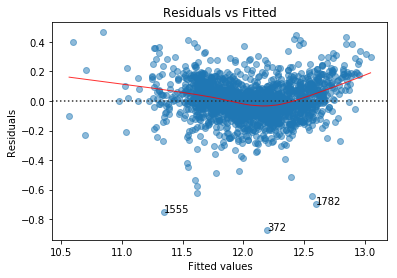

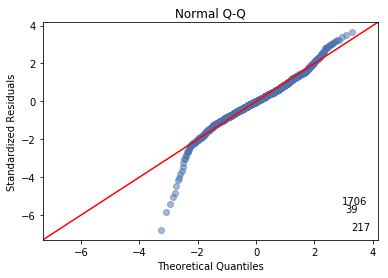

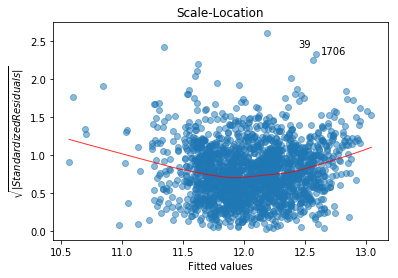

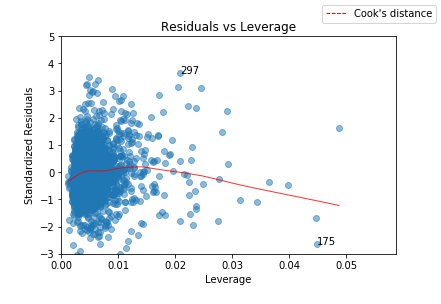

In [84]:
diagnostic_plots.diagnostic_plots(np.log1p(X_train[['Total Bsmt SF','TotRms AbvGrd',
                                                      'Bedroom AbvGr','Garage Area',
                                                      'Lot Area','Year Built','Overall Cond',
                                                      'Fireplaces',
                                                    'Overall Qual',
                     'Gr Liv Area']]),
                                  np.log1p(y_train),model_fit=remodel1)

Though, the error distribution seems to be better on left side from Normal Q-Q but it increased on the right side. Also, residual vs fitted is not showing proper linear regression. In residuals vs Leverage we have a high leverage point(175). RMSE has been reduced to 26886 at the end.